In [1]:
from utils.classifier import *
from utils.dataloader import *
from utils.features import *
from utils.helper import *
from utils.processing import *
import pickle

In [2]:
RANDOM_STATE = 66
ROOT_PATH, DATA_PATH, OUT_PATH = get_paths()
PARAMS = []
NUMB_LAEBLS = 4
L= 15
print(ROOT_PATH)

/Users/moooooo16/Documents/Computer Vision/Project/elpv


In [3]:
from sklearn.model_selection import train_test_split
img_path, prob, types, labels= load_data(DATA_PATH, NUMB_LAEBLS)

feature_builder = FeatureExtraction(DATA_PATH, img_path, labels, L)
X_train, X_test, y_train, y_test = feature_builder.split_data(train_test_split, randome_state=RANDOM_STATE, stratify=True, split_ratio=0.25)
# X_train, X_val, y_train, y_val = feature_builder.split_data(train_test_split, randome_state=RANDOM_STATE, stratify=True, split_ratio=0.1)
print(X_train.shape, X_test.shape)

[0 1 2 3] [1508  295  106  715]
(1968, 300, 300) (656, 300, 300)


In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3]), array([1131,  221,   80,  536]))

In [5]:
preprocess_pipeline = [
    # (strech_img, {
    #     }),
    # (clach_img, {
    #     'clipLimit': 2.0,
    #     'tileGridSize': (8, 8)}),
    # (guassian_blur, {
    #     'kernel_size': (0, 0),
    #     'sigmaX': 3}),
    # (lap_feature, {
    #     'dst': -1,
    #     'ksize' : 5}),
    # (morpo_opening, {
    #     'kernel': np.ones((2,2), np.uint8),
    #     'iterations': 1}),
    (morph_smoothing, {
        'ses' : feature_builder.ses})
]

In [6]:
X_train_prepro = feature_builder.preprocess(X_train, preprocess_pipeline = preprocess_pipeline)
X_test_prepro = feature_builder.preprocess(X_test, preprocess_pipeline = preprocess_pipeline)

with open(os.path.join(OUT_PATH ,'X_prepro.pkl'), 'wb') as f:
    pickle.dump((X_train_prepro, X_test_prepro), f)

Pre-processing images: 100%|██████████| 656/656 [23:57<00:00,  2.19s/it]


In [7]:
# X_train_prepro,  X_test_prepro = None, None

# with open(os.path.join(OUT_PATH ,'X_prepro.pkl'), 'rb') as f:
#     X_train_prepro, X_test_prepro = pickle.load(f)

# Method 1
Using matrix operation to re-construct the testing data, and then calculate the error.

In [8]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# indices = np.where( (y_train == 0) | (y_train == 4))[0]
indices = np.where(y_train == 0)[0]

thresh_mean, thresh_std = feature_builder.calculate_threshold(kf, X_train_prepro, y_train, indices )
thresh_mean, thresh_std


# X shape: (904, 90000), y shape: (227, 90000)
# X_plus shape: (90000, 904)
# y_hat shape: (227, 90000)
# C shape: (227,)
# C shape after reshape: (227, 1)
# errors shape: (227,)

Fold 1 mean error: 1298.110668869948, std error: 672.0477066167731
Fold 2 mean error: 1236.9625374115744, std error: 647.7310913718975
Fold 3 mean error: 1207.6654657673362, std error: 643.8922324316953
Fold 4 mean error: 1241.39040702993, std error: 595.7603666665658
Fold 5 mean error: 1231.5125026023381, std error: 630.4081094597175


(1243.1283163362252, 637.9679013093298)

In [9]:
X = X_train_prepro[y_train == 0].reshape(y_train[y_train == 0].shape[0], -1)
errors = feature_builder.calculate_error(X,  X_test_prepro.reshape(y_test.shape[0], -1))

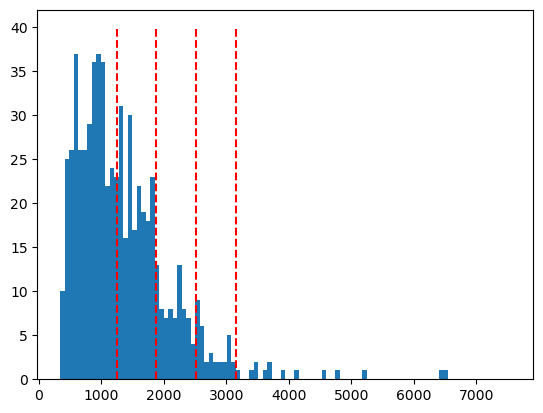

In [10]:
from matplotlib import pyplot as plt
int_errors = errors.astype(int)
plt.hist(errors, bins=100, range = (np.min(int_errors), np.max(int_errors)))
plt.vlines(thresh_mean, 0, 40, colors='r', linestyles='dashed')
plt.vlines(thresh_mean + thresh_std, 0, 40, colors='r', linestyles='dashed')
plt.vlines(thresh_mean + 2* thresh_std, 0, 40, colors='r', linestyles='dashed')
plt.vlines(thresh_mean + 3* thresh_std, 0, 40, colors='r', linestyles='dashed')
plt.show()

In [11]:
prediction = np.zeros(y_test.shape[0])
prediction[errors > thresh_mean + 1 * thresh_std] = 1
y_test_binary = np.where(y_test == 0, 0, 1)
get_report(y_test_binary, prediction)

Testset Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       377
           1       0.64      0.27      0.38       279

    accuracy                           0.62       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.63      0.62      0.58       656




(0.625,
 array([[334,  43],
        [203,  76]]))

In [12]:
np.unique(y_test_binary, return_counts=True)

(array([0, 1]), array([377, 279]))

(array([11.,  6.,  8.,  9.,  8., 10.,  9.,  8., 15.,  7., 10., 13., 13.,
         5., 15., 11., 14.,  8.,  9.,  7., 10.,  7.,  6.,  4.,  6.,  5.,
         5.,  7.,  2.,  4.,  1.,  3.,  0.,  1.,  1.,  2.,  1.,  4.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 409.44242796,  480.87903188,  552.31563579,  623.75223971,
         695.18884363,  766.62544754,  838.06205146,  909.49865538,
         980.93525929, 1052.37186321, 1123.80846712, 1195.24507104,
        1266.68167496, 1338.11827887, 1409.55488279, 1480.9914867 ,
        1552.42809062, 1623.86469454, 1695.30129845, 1766.73790237,
        1838.17450629, 1909.6111102 , 1981.04771412, 2052.48431803,
        2123.92092195, 219

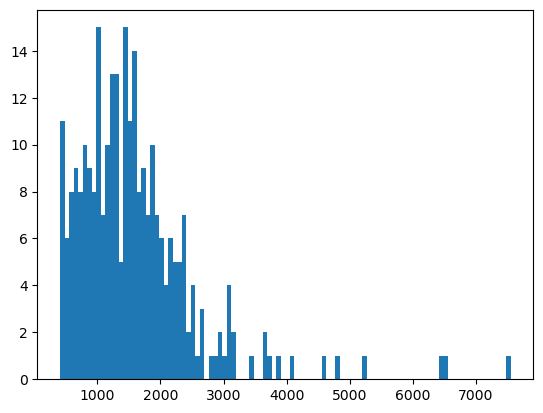

In [13]:
plt.hist(errors[y_test_binary == 1], bins=100)

# Method 2:
Use ICA
- U = W * X
- b = y * U^+
- Use b as feature vector to train a SVM classifier